<a href="https://colab.research.google.com/github/ardra-aaah/IPLDataVisualisation/blob/main/wk4_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('train.csv')

In [33]:
#Understanding the Data: Structure, Missing, Types
df.info()
df.head()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
#Summary of survival by sex and class
print("Summary of survival by sex:\n", df.groupby('Sex')['Survived'].mean())
print("Summary of survival by class:\n", df.groupby('Pclass')['Survived'].mean())


Summary of survival by sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Summary of survival by class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


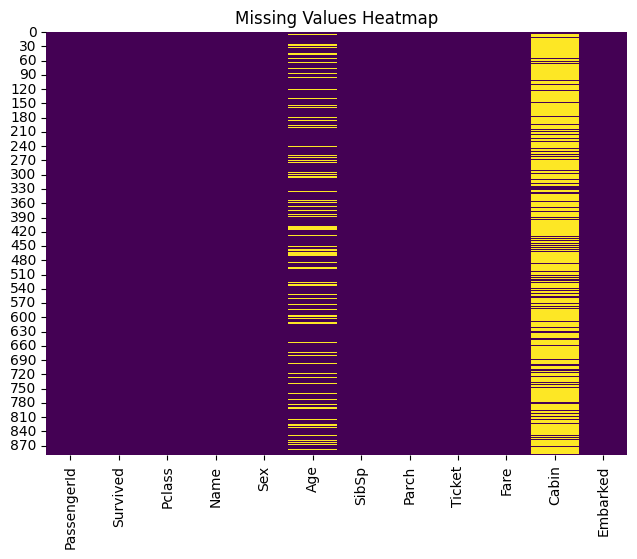

In [36]:
# Visualising missing data
plt.figure(figsize=(7.5,5.5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



In [7]:
#Initial cleaning: Dropping "Cabin" as it is mostly empty, Filling missing "Age" with median, dropping rows with missing "embarked"
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df.dropna(subset=['Embarked'], inplace=True)


Number of children (under 18) who died: 52


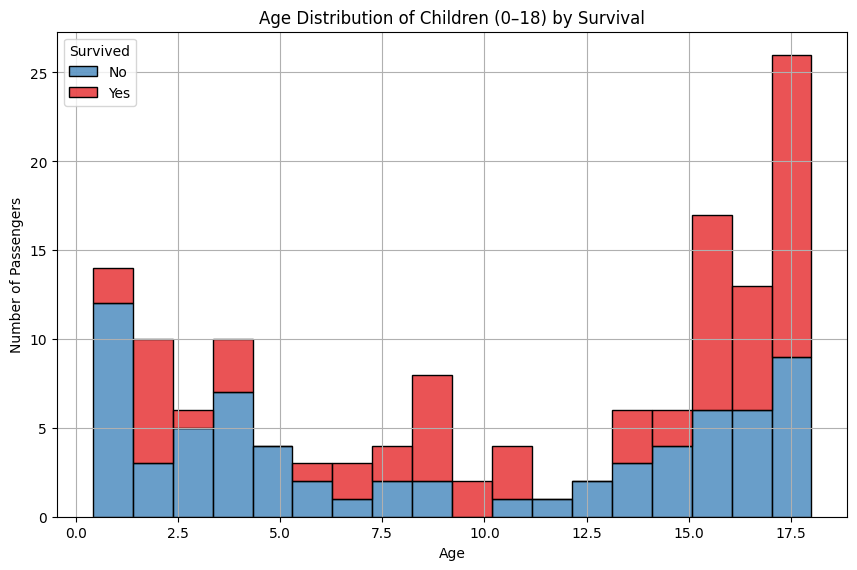

In [49]:
#Finding the count of children(<18yrs) died and visualising thheir age distribution with survival status.
n_chi_died = df[(df['Age'] < 18) & (df['Survived'] == 0)].shape[0]
print(f"Number of children (under 18) who died: {n_chi_died}")

# Filtering for children aged 0–18
children = df[(df['Age'] >= 0) & (df['Age'] <= 18)]

# Plotting age distribution, colored by survival status
plt.figure(figsize=(10.2, 6.3))
sns.histplot(data=children, x='Age', hue='Survived', multiple='stack', bins=18, palette='Set1')
plt.title('Age Distribution of Children (0–18) by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

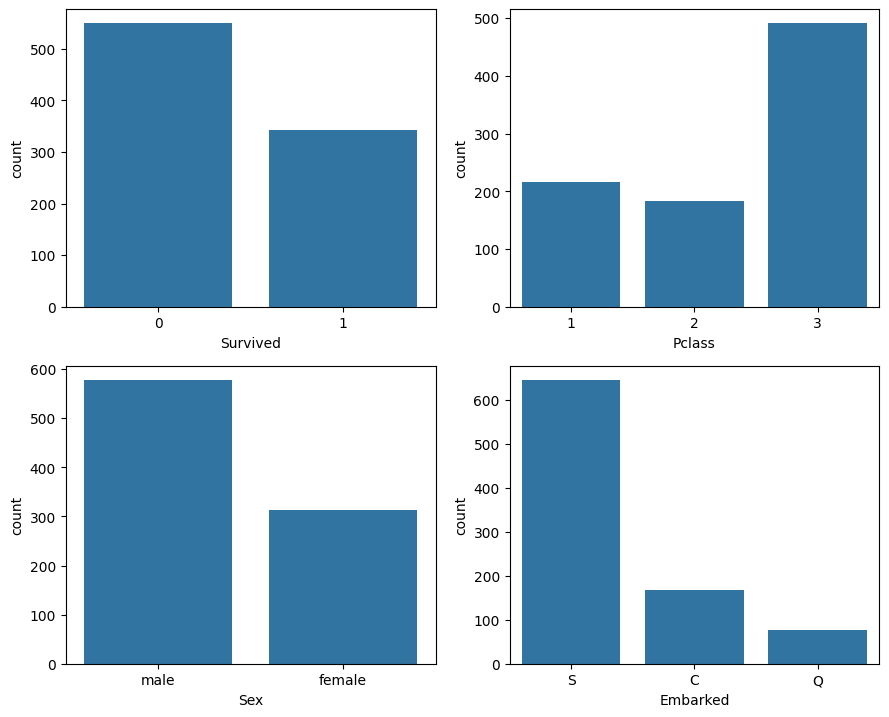

In [48]:
#Univariate Analysis: categorical features-Survived, Pclass, Sex, Embarked
fig, axes = plt.subplots(2, 2, figsize=(10.5,8.5))
sns.countplot(x='Survived', data=df, ax=axes[0,0])
sns.countplot(x='Pclass', data=df, ax=axes[0,1])
sns.countplot(x='Sex', data=df, ax=axes[1,0])
sns.countplot(x='Embarked', data=df, ax=axes[1,1])


<Axes: ylabel='Fare'>

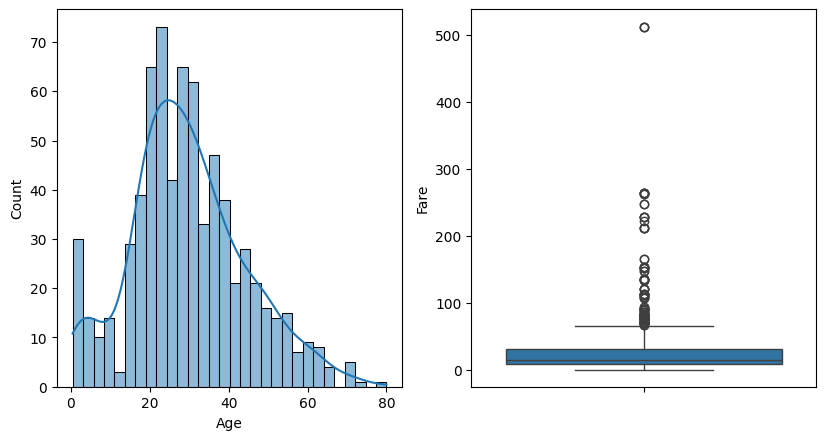

In [47]:
#Univariate Analysis: Numerical features (Age, Fare)
fig, ax = plt.subplots(1,2, figsize=(9.8,4.9))
sns.histplot(df['Age'], bins=30, kde=True, ax=ax[0])
sns.boxplot(y=df['Fare'], ax=ax[1])


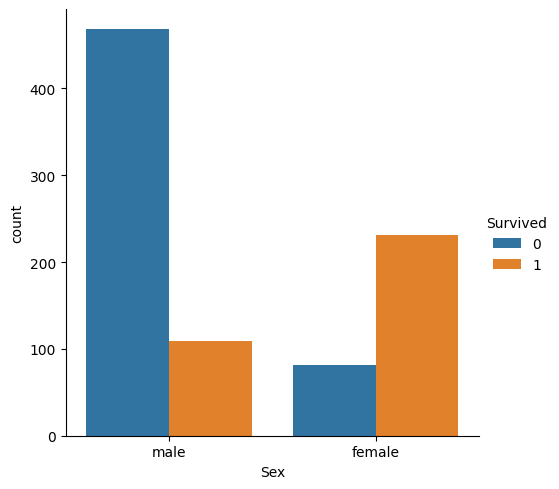

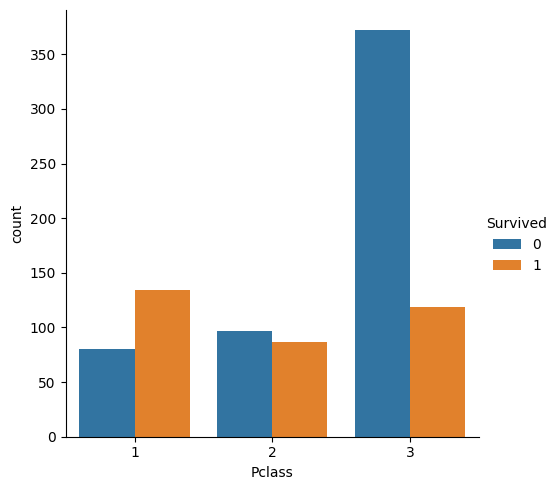

In [10]:
# Bivariate Analysis: survival v/s categorical variables
sns.catplot(x='Sex', hue='Survived', kind='count', data=df)
sns.catplot(x='Pclass', hue='Survived', kind='count', data=df)


<Axes: xlabel='Survived', ylabel='Age'>

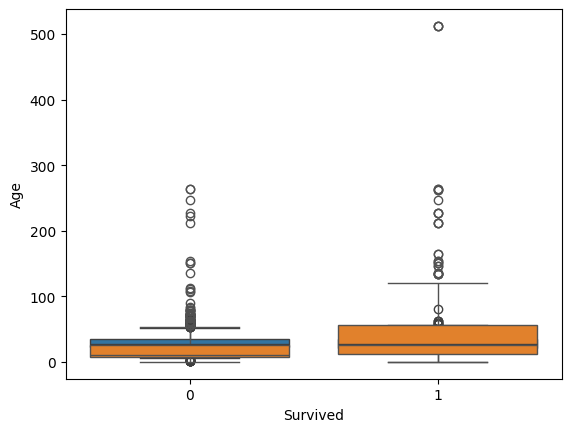

In [11]:
#Bivariate Analysis: Continuous v/s Survival variables
sns.boxplot(x='Survived', y='Age', data=df)
sns.boxplot(x='Survived', y='Fare', data=df)


In [14]:
# Correlation & Relationships: Creating new features:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


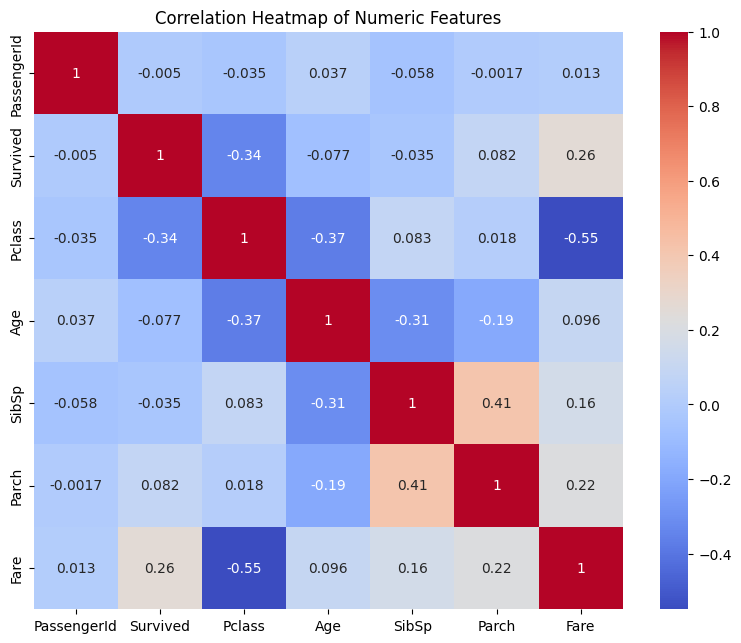

In [42]:
#Correlation heatmap for numeric columns
# Selecting only numeric columns for correlation matrix
corr = df.select_dtypes(include='number').corr()

# Plotting the heatmap
plt.figure(figsize=(9.5, 7.5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


<Axes: xlabel='Survived', ylabel='Pclass'>

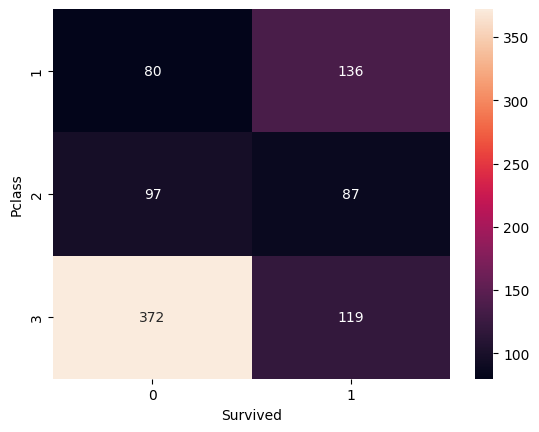

In [39]:
#Crosstabs + heatmap for two categorical variables
ct = pd.crosstab(df['Pclass'], df['Survived'])
sns.heatmap(ct, annot=True, fmt="d")


<Axes: xlabel='Survived', ylabel='Age'>

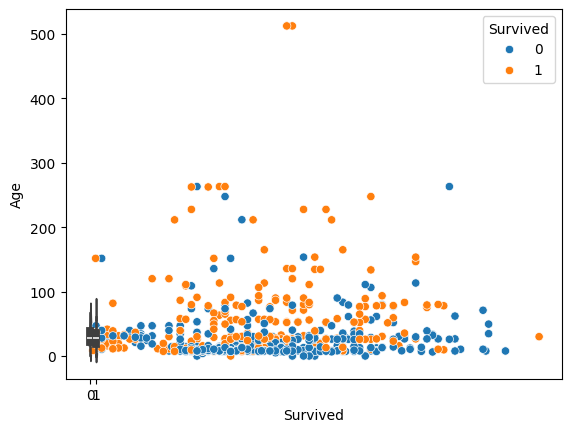

In [40]:
#Outlier detection & distribution Check
sns.violinplot(x='Survived', y='Age', data=df)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
